## Purpose: Take list of specific Repetitive elements, get information nucleotide length, number of occurences in genome, and expression levels across genome.

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

#import data
df_repeat = pd.read_csv("/Volumes/MePortDrive/LinkLab/Ahringer_ATAC/ws220_repeats.txt",
                       sep="\t", names=["chrom", "start", "end", "repeat","RE"])

df_tom = pd.read_csv("/Volumes/MePortDrive/LinkLab/Ahringer_ATAC/tom_repeats.txt",
                       sep="\t")

#merge repeats of interest with whole repeats file
df_tomsRepeats = df_repeat.merge(df_tom, on="repeat")

#convert start and end into integers
df_tomsRepeats['start'] = df_tomsRepeats.start.astype("int", inplace = True)
df_tomsRepeats['end'] = df_tomsRepeats.end.astype("int", inplace = True)

#make length column
df_tomsRepeats['length'] = df_tomsRepeats['end'] - df_tomsRepeats['start']

#make dataframe for number of occurences of repeats
df_occur = pd.DataFrame(df_tomsRepeats.repeat.value_counts()).reset_index()

#rename columns
df_occur.columns = ['repeat', 'occurence']

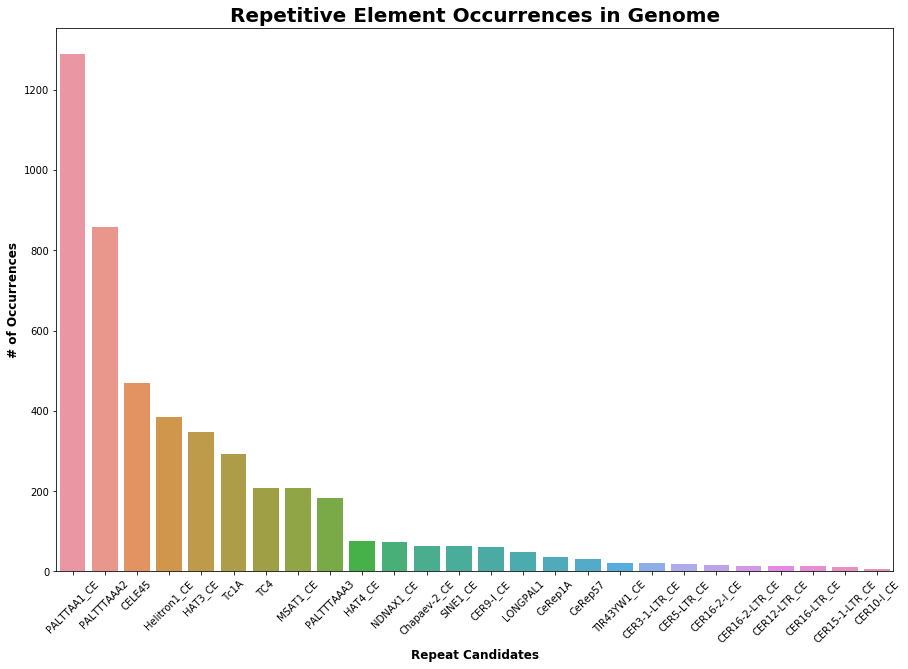

In [4]:
#plot repeat occurences
sns_plot = plt.figure(figsize=[15,10])
sns.barplot(x='repeat', y='occurence', data=df_occur)
plt.xticks(rotation=45)
plt.title("Repetitive Element Occurrences in Genome", fontweight="bold", fontsize='20')
plt.xlabel("Repeat Candidates", fontweight="bold", fontsize=12)
plt.ylabel("# of Occurrences", fontweight="bold", fontsize=12)
#sns_plot.savefig("/Users/patrickgonzales/Desktop/TomRepeats_REoccurences.png")
plt.show()

In [5]:
df_tomsRepeats.to_csv("/Users/patrickgonzales/Desktop/TomRepeats.csv")

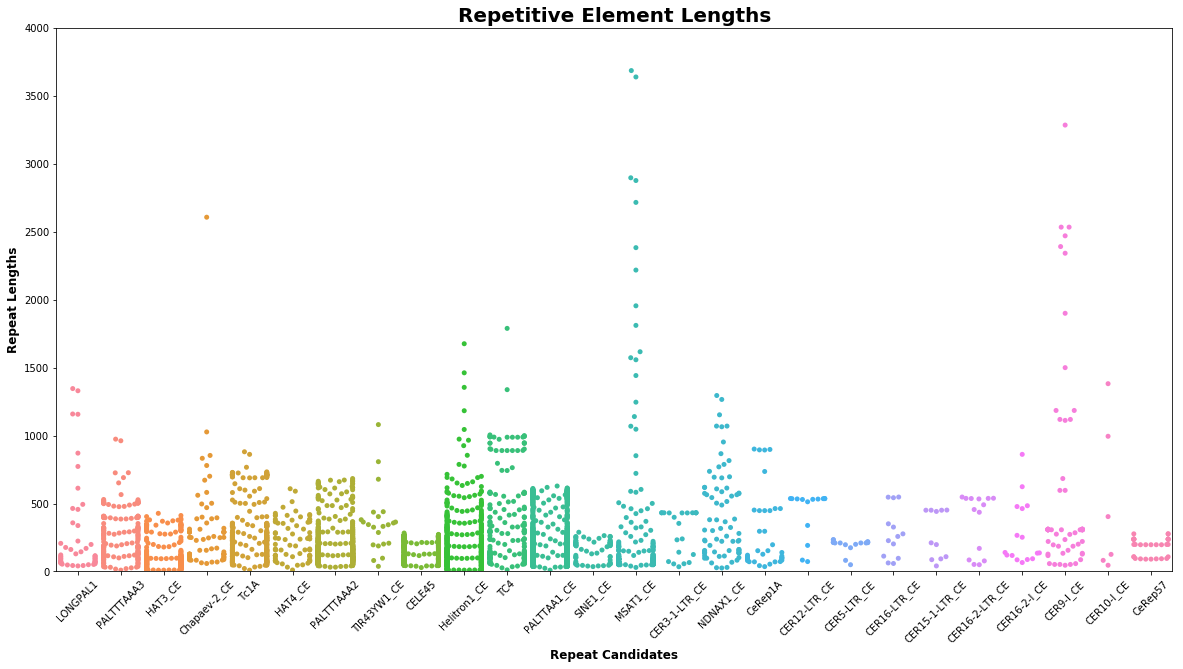

In [6]:
#plot length 
sns_plot = plt.figure(figsize=[20,10])
sns.swarmplot(x='repeat', y='length', data=df_tomsRepeats)
plt.xticks(rotation=45)
plt.title("Repetitive Element Lengths", fontweight="bold", fontsize='20')
plt.xlabel("Repeat Candidates", fontweight="bold", fontsize=12)
plt.ylabel("Repeat Lengths", fontweight="bold", fontsize=12)
plt.ylim([0,4000])
#sns_plot.savefig("/Users/patrickgonzales/Desktop/TomRepeats_swarmplot.png")
plt.show()

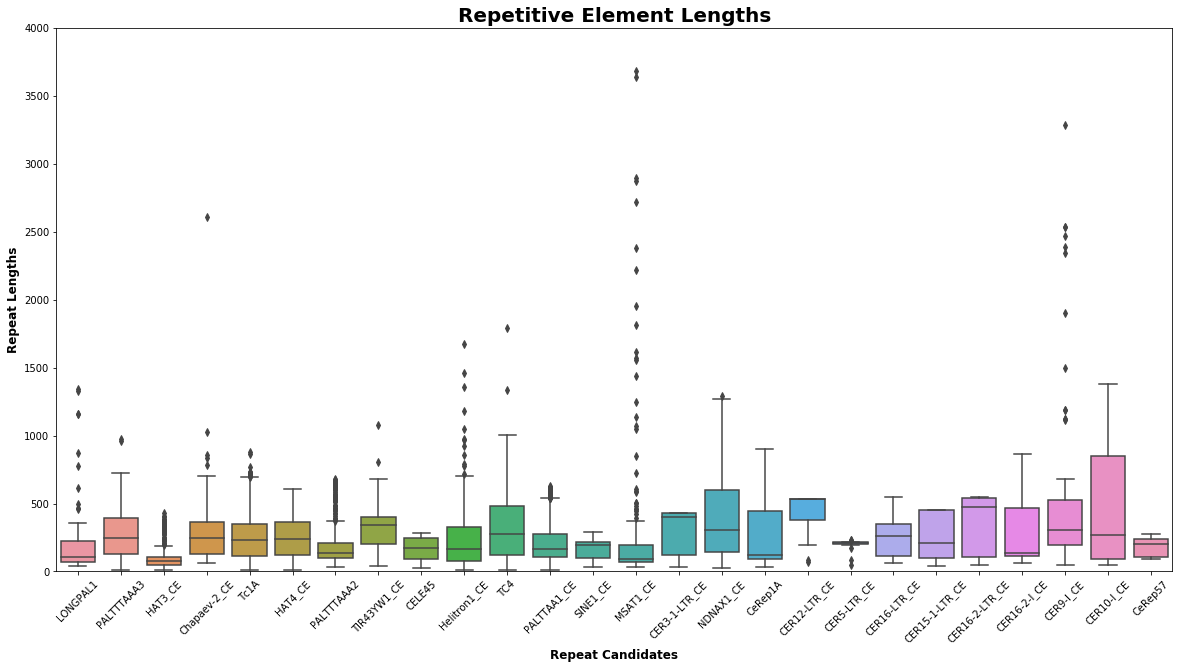

In [7]:
#plot length 
sns_plot = plt.figure(figsize=[20,10])
sns.boxplot(x='repeat', y='length', data=df_tomsRepeats)
plt.xticks(rotation=45)
plt.title("Repetitive Element Lengths", fontweight="bold", fontsize='20')
plt.xlabel("Repeat Candidates", fontweight="bold", fontsize=12)
plt.ylabel("Repeat Lengths", fontweight="bold", fontsize=12)
plt.ylim([0,4000])
#sns_plot.savefig("/Users/patrickgonzales/Desktop/TomRepeats_boxplot.png")
plt.show()

#bedtools
bedtools merge -d 15 -c 4,5,6,7,8,9,10,11,12 -o mean,distinct,first,last,distinct,distinct,distinct,sum,distinct -i fileforMerging.bed > Merged_ATAC_repeat.bed

In [8]:
#import data
df_cluster = pd.read_csv("/Volumes/MePortDrive/LinkLab/Ahringer_ATAC/ATAC_cluster_overlapRE.txt",sep="\t")
df_cluster.head()

,ATAC_chrom,ATAC_windowstart,ATAC_windowend,ATAC_peakLength,ATAC_peakSize,RE_chr,RE_start,RE_end,RE_repeat,RE_Class,RE_length,RE_overlap,pct_RE_covered
0,chrI,1620,1750,130,1.334673,chrI,1622,1744,LONGPAL1,DNA/MULE-MuDR,122,122,1.000000
1,chrI,2050,2880,830,0.694830,chrI,2052,3026,PALTTTAAA3,DNA,974,828,0.850103
2,chrI,2920,3070,150,0.522598,chrI,2052,3026,PALTTTAAA3,DNA,974,106,0.108830
3,chrI,3120,3170,50,0.185018,chrI,3124,3652,PALTTTAAA3,DNA,528,46,0.087121
4,chrI,3260,3660,400,4.994315,chrI,3124,3652,PALTTTAAA3,DNA,528,392,0.742424


In [9]:
#determine ATAC peak size distribution by repeat
repeatList = list(df_cluster.RE_repeat.unique())
repeatList

['LONGPAL1',
 'PALTTTAAA3',
 'HAT3_CE',
 'Chapaev-2_CE',
 'Tc1A',
 'HAT4_CE',
 'PALTTTAAA2',
 'TIR43YW1_CE',
 'CELE45',
 'Helitron1_CE',
 'TC4',
 'PALTTAA1_CE',
 'SINE1_CE',
 'MSAT1_CE',
 'CER3-1-LTR_CE',
 'NDNAX1_CE',
 'CeRep1A',
 'CER12-LTR_CE',
 'CER5-LTR_CE',
 'CER16-LTR_CE',
 'CER15-1-LTR_CE',
 'CER16-2-LTR_CE',
 'CER16-2-I_CE',
 'CER9-I_CE',
 'CER10-I_CE',
 'CeRep57']

/Users/patrickgonzales/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


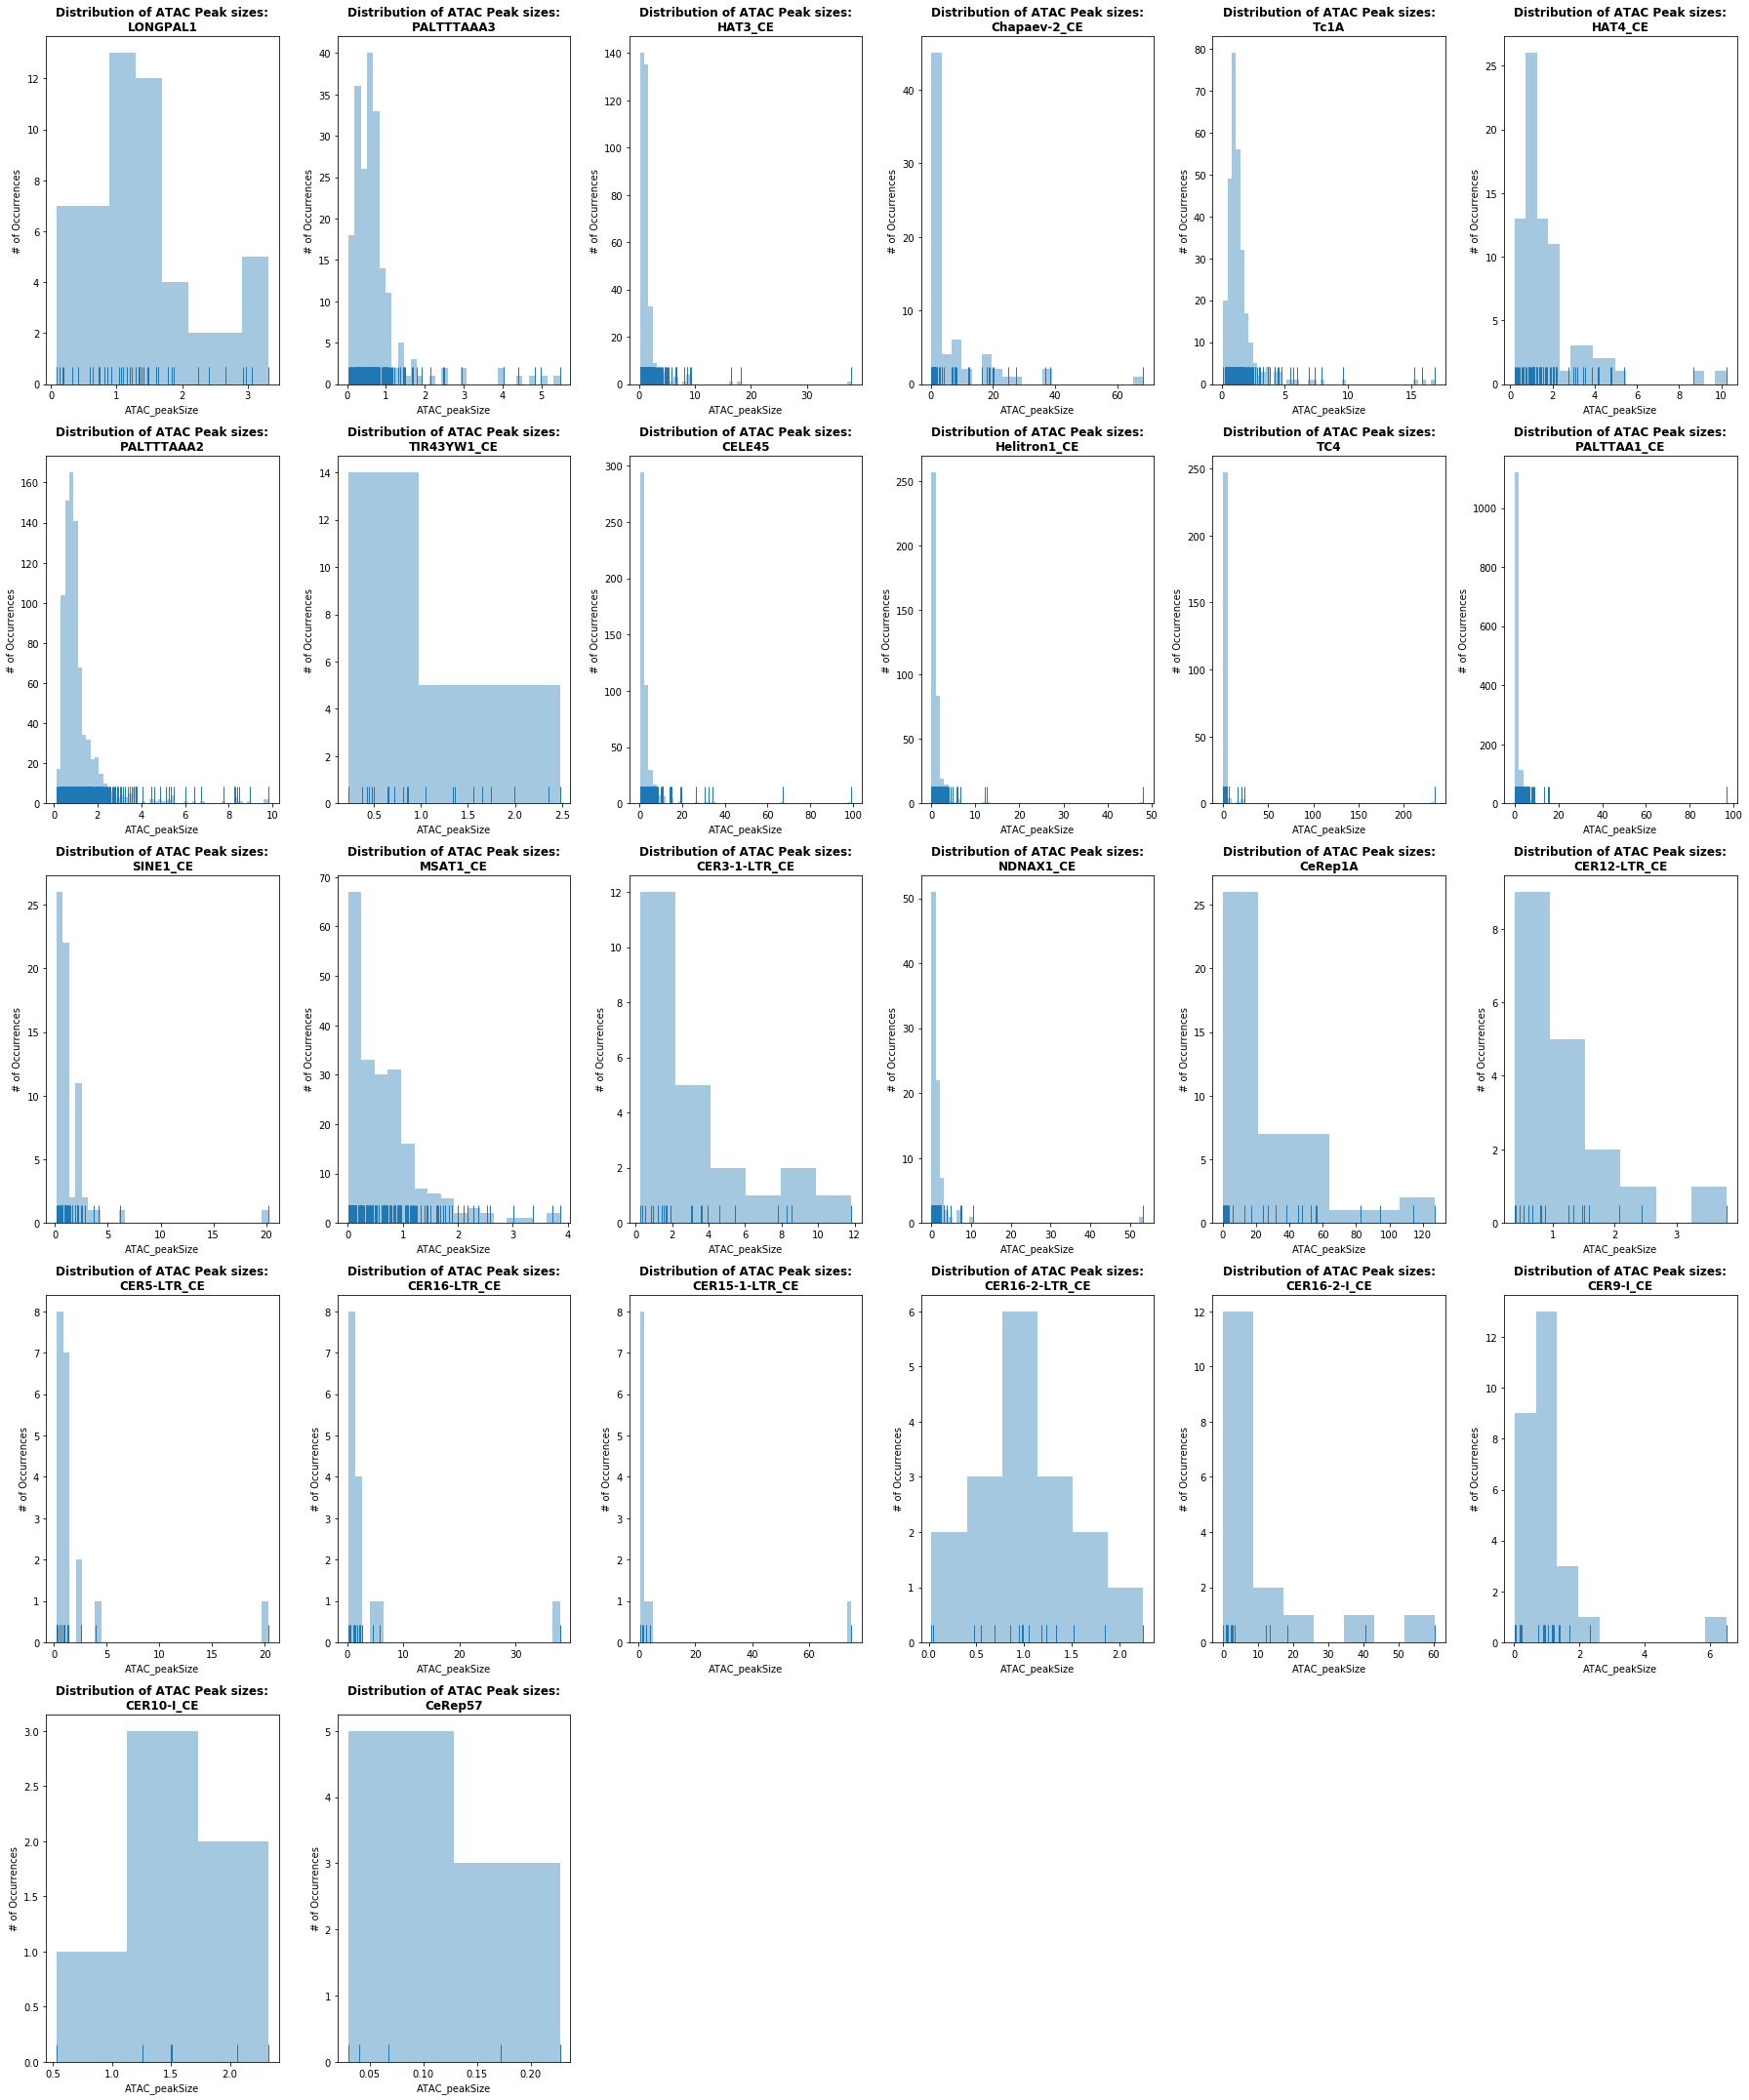

In [10]:
#setup plot
sns_plot3 = plt.figure(figsize=[25,30])

#loopit
for rep,num in zip(repeatList, range(1,27)):
    x = df_cluster[df_cluster["RE_repeat"]== rep]
    plt.subplot(5,6,num)
    sns.distplot(x['ATAC_peakSize'],kde=False, rug=True)
    plt.ylabel("# of Occurrences")
    plt.title("Distribution of ATAC Peak sizes:\n" + rep, fontweight="bold")
    plt.tight_layout()
plt.show()

#sns_plot3.savefig("/Users/patrickgonzales/Desktop/TomRepeats_ATACpeakSizeDistributionoverREs.png")

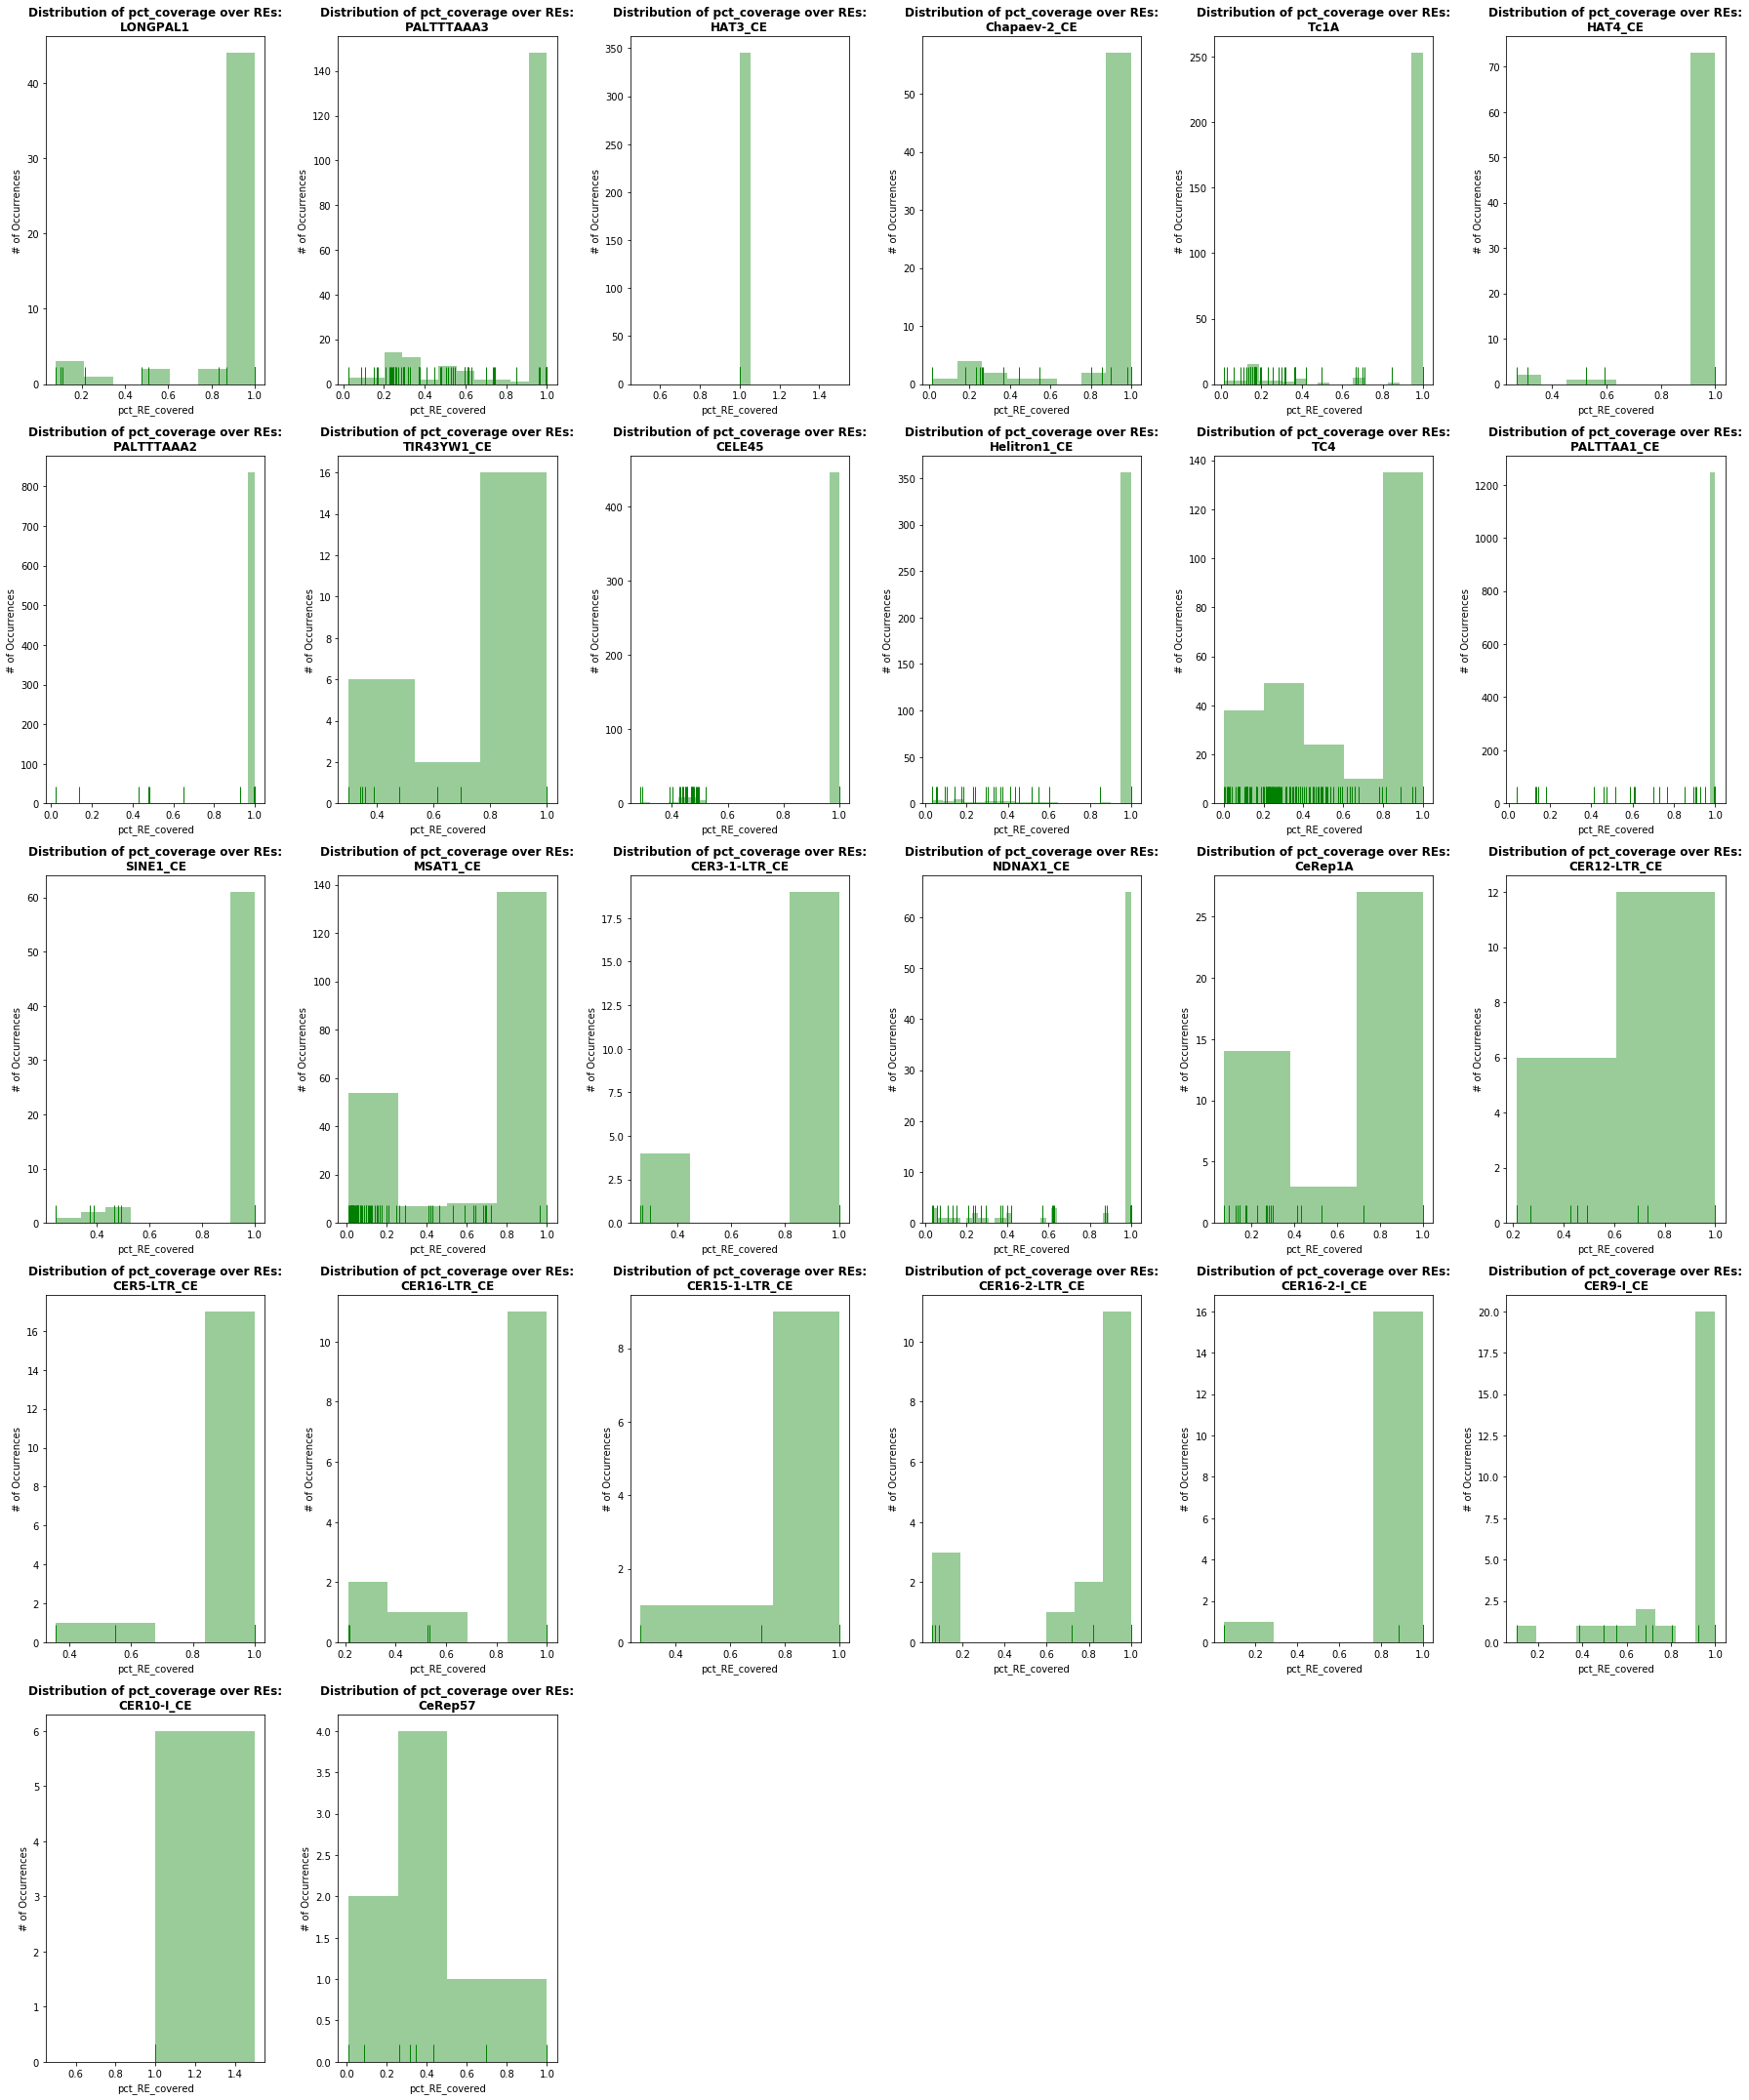

In [11]:
#setup plot
sns_plot3 = plt.figure(figsize=[25,30])

#loopit
for rep,num in zip(repeatList, range(1,27)):
    x = df_cluster[df_cluster["RE_repeat"]== rep]
    plt.subplot(5,6,num)
    sns.distplot(x['pct_RE_covered'],kde=False, rug=True, color="green")
    plt.ylabel("# of Occurrences")
    plt.title("Distribution of pct_coverage over REs:\n" + rep, fontweight="bold")
    plt.tight_layout()
plt.show()

#sns_plot3.savefig("/Users/patrickgonzales/Desktop/TomRepeats_ATAC_coverage_overREs.png")

In [12]:
#slice repeat list by factor of 9
re_list1 = repeatList[0:10]
re_list2 = repeatList[10:19]
re_list3 = repeatList[19:27]

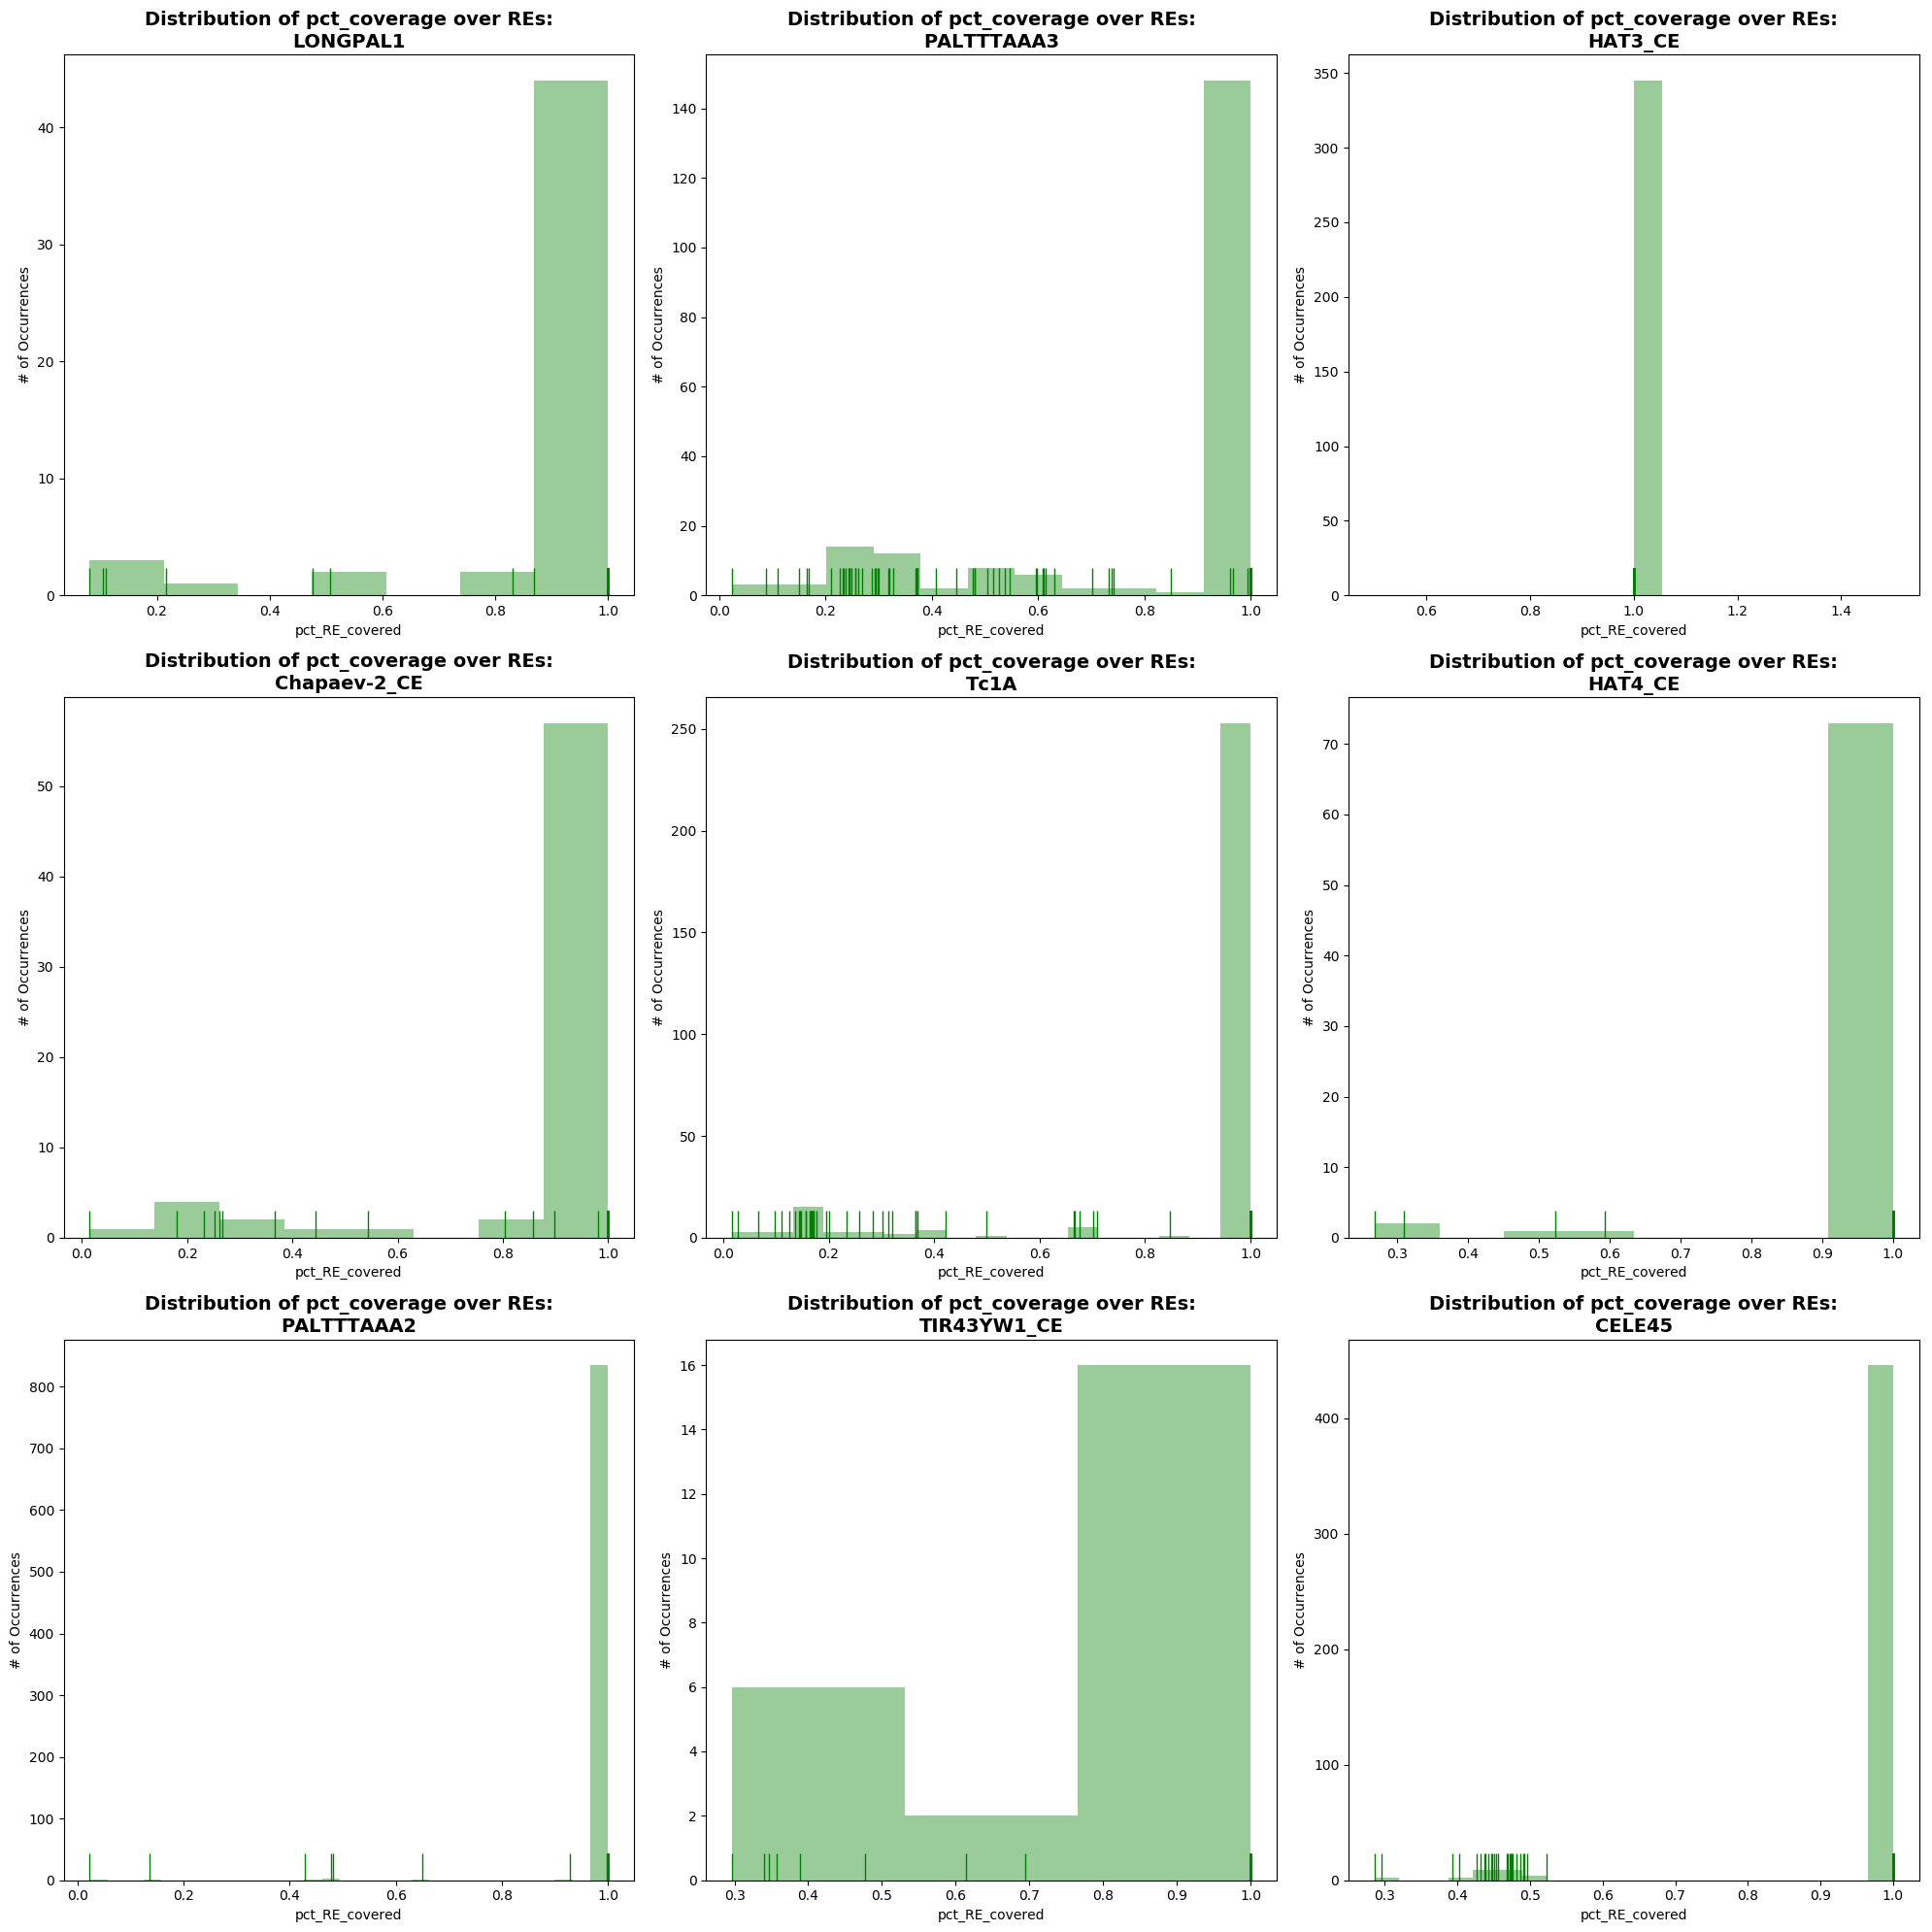

In [13]:
#setup plot
sns_plot4 = plt.figure(figsize=[20,20], dpi=100)

#loopit
for rep,num in zip(re_list1, range(1,10)):
    x = df_cluster[df_cluster["RE_repeat"]== rep]
    plt.subplot(3,3,num)
    sns.distplot(x['pct_RE_covered'],kde=False, rug=True, color="green")
    plt.ylabel("# of Occurrences")
    plt.title("Distribution of pct_coverage over REs:\n" + rep, fontweight="bold", fontsize=14)
    plt.tight_layout()
plt.show()

#sns_plot4.savefig("/Users/patrickgonzales/Desktop/TomRepeats_ATAC_coverage_overREslist1.png")


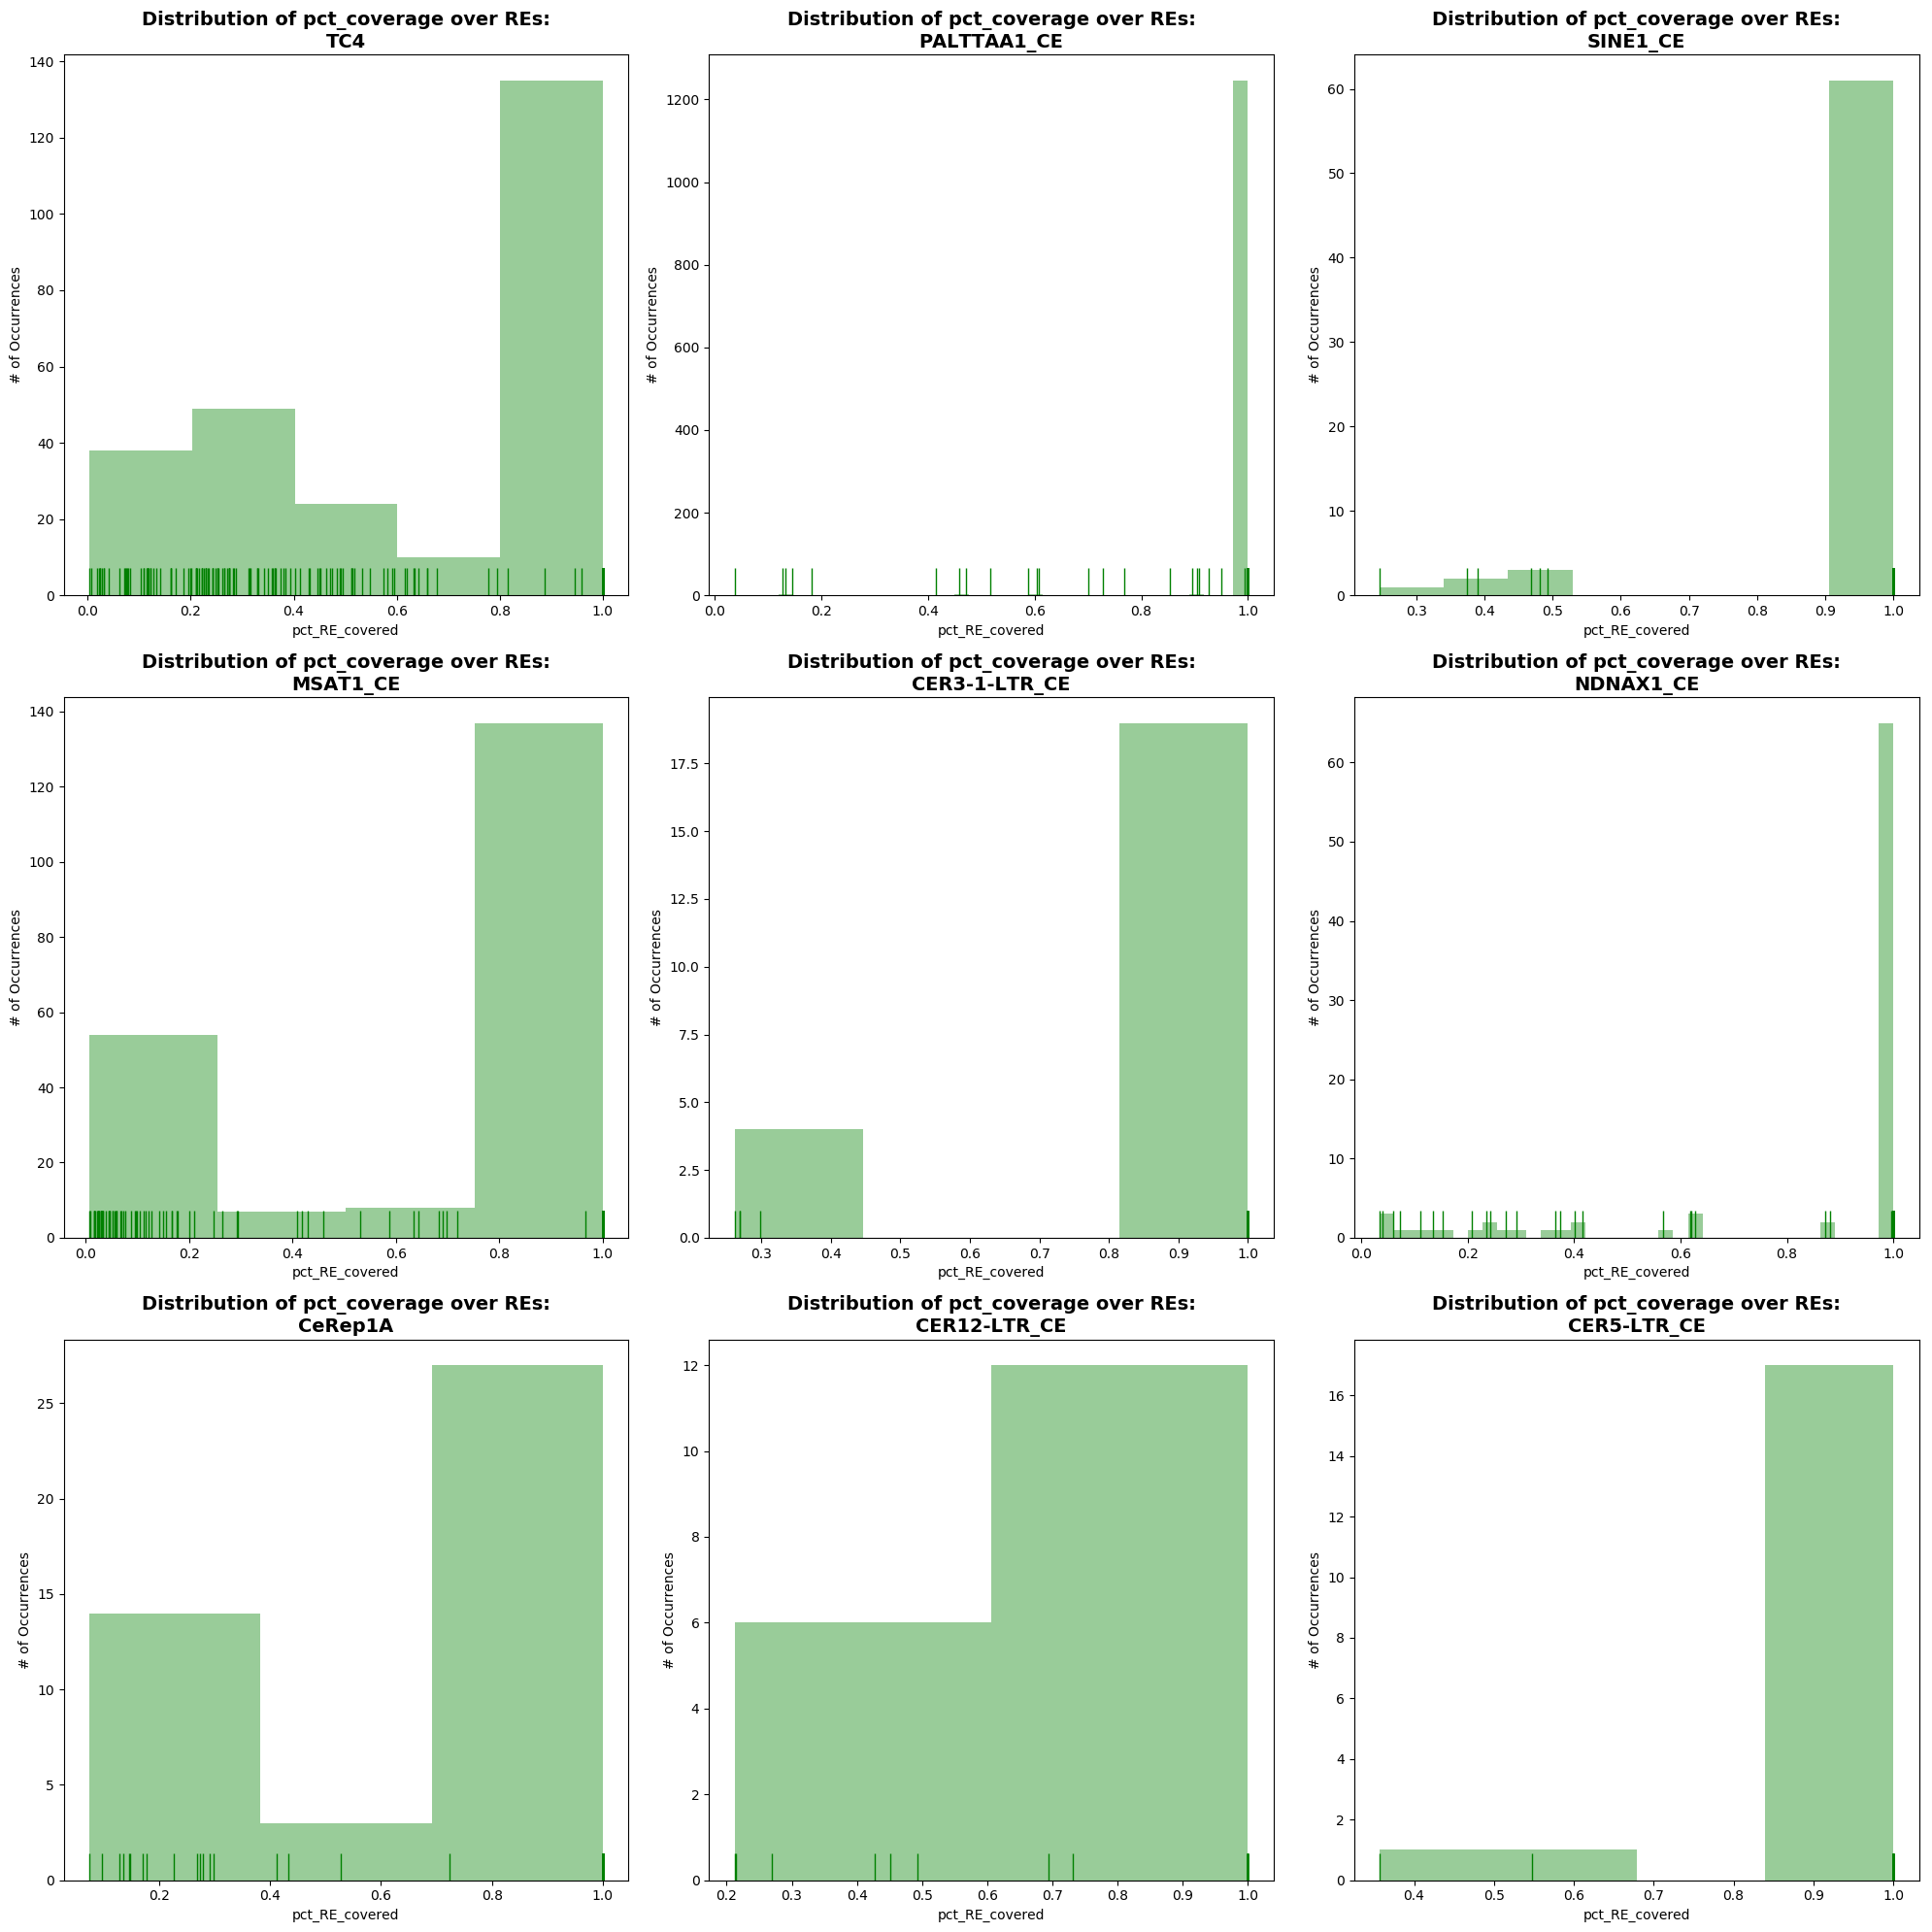

In [14]:
#setup plot
sns_plot5 = plt.figure(figsize=[20,20], dpi=100)

#loopit
for rep,num in zip(re_list2, range(1,10)):
    x = df_cluster[df_cluster["RE_repeat"]== rep]
    plt.subplot(3,3,num)
    sns.distplot(x['pct_RE_covered'],kde=False, rug=True, color="green")
    plt.ylabel("# of Occurrences")
    plt.title("Distribution of pct_coverage over REs:\n" + rep, fontweight="bold", fontsize=14)
    plt.tight_layout()
plt.show()

#sns_plot5.savefig("/Users/patrickgonzales/Desktop/TomRepeats_ATAC_coverage_overREslist2.png")


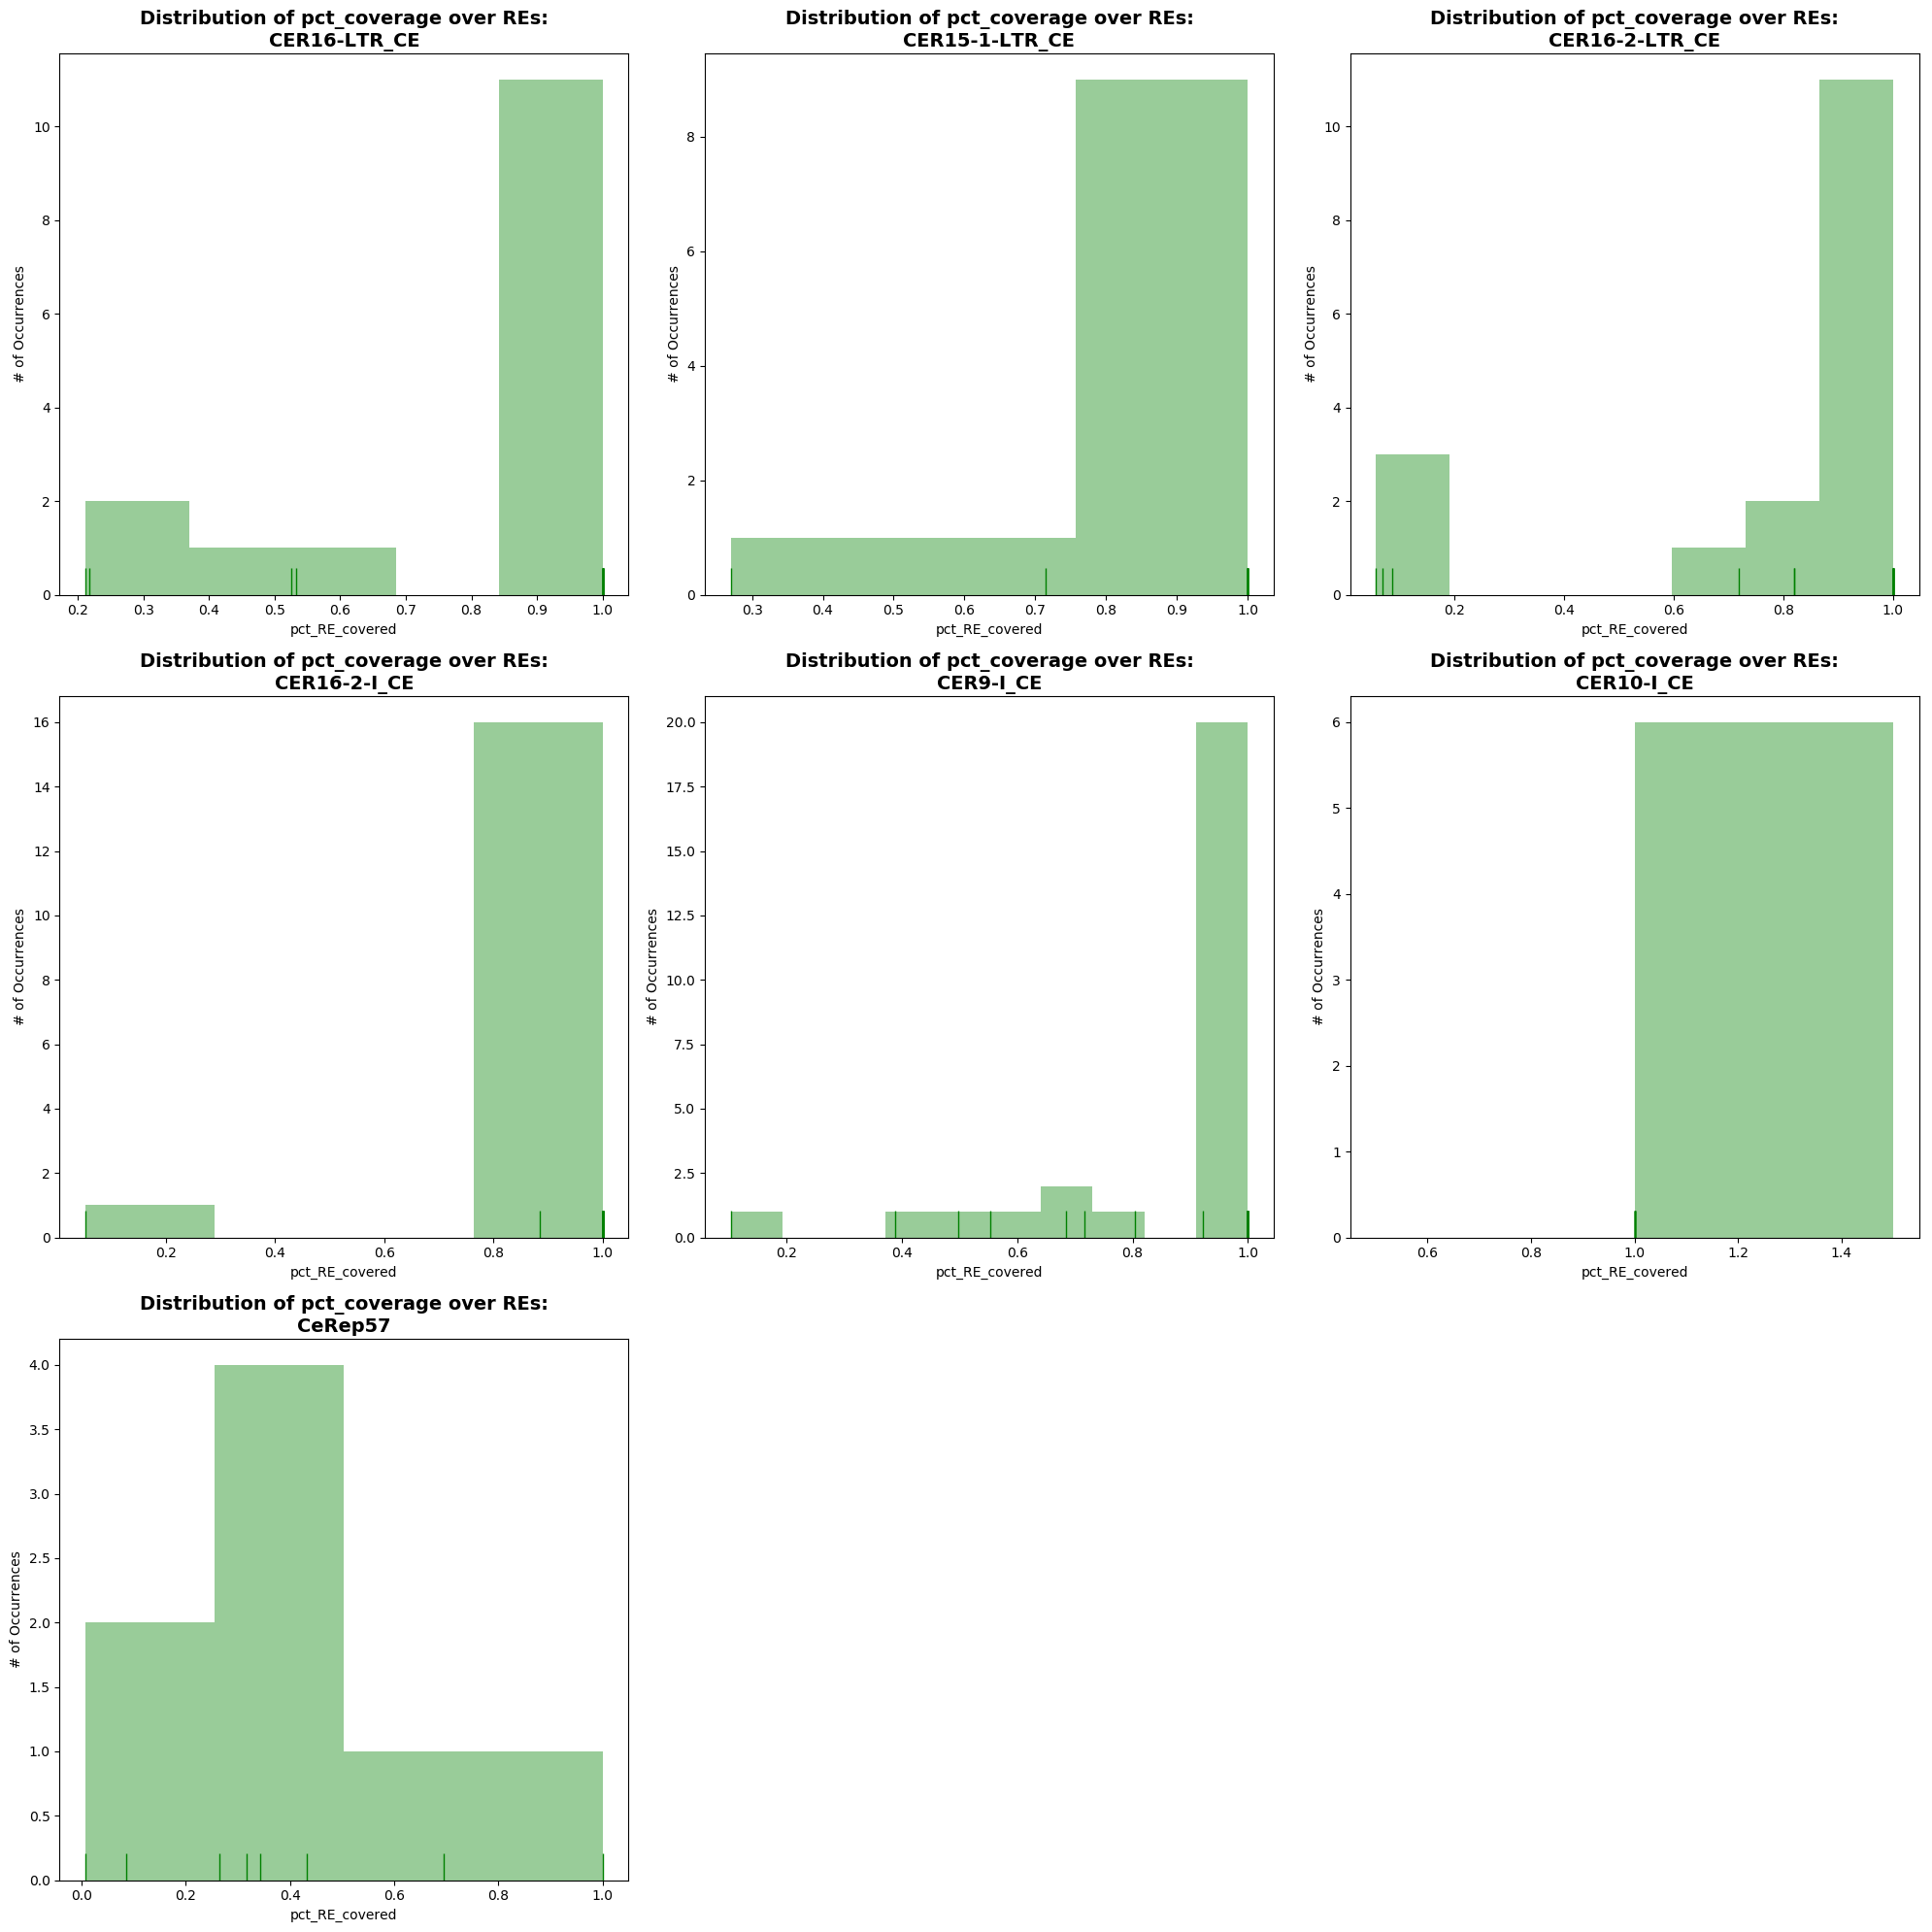

In [15]:
#setup plot
sns_plot6 = plt.figure(figsize=[20,20], dpi=100)

#loopit
for rep,num in zip(re_list3, range(1,10)):
    x = df_cluster[df_cluster["RE_repeat"]== rep]
    plt.subplot(3,3,num)
    sns.distplot(x['pct_RE_covered'],kde=False, rug=True, color="green")
    plt.ylabel("# of Occurrences")
    plt.title("Distribution of pct_coverage over REs:\n" + rep, fontweight="bold", fontsize=14)
    plt.tight_layout()
plt.show()

#sns_plot6.savefig("/Users/patrickgonzales/Desktop/TomRepeats_ATAC_coverage_overREslist3.png")


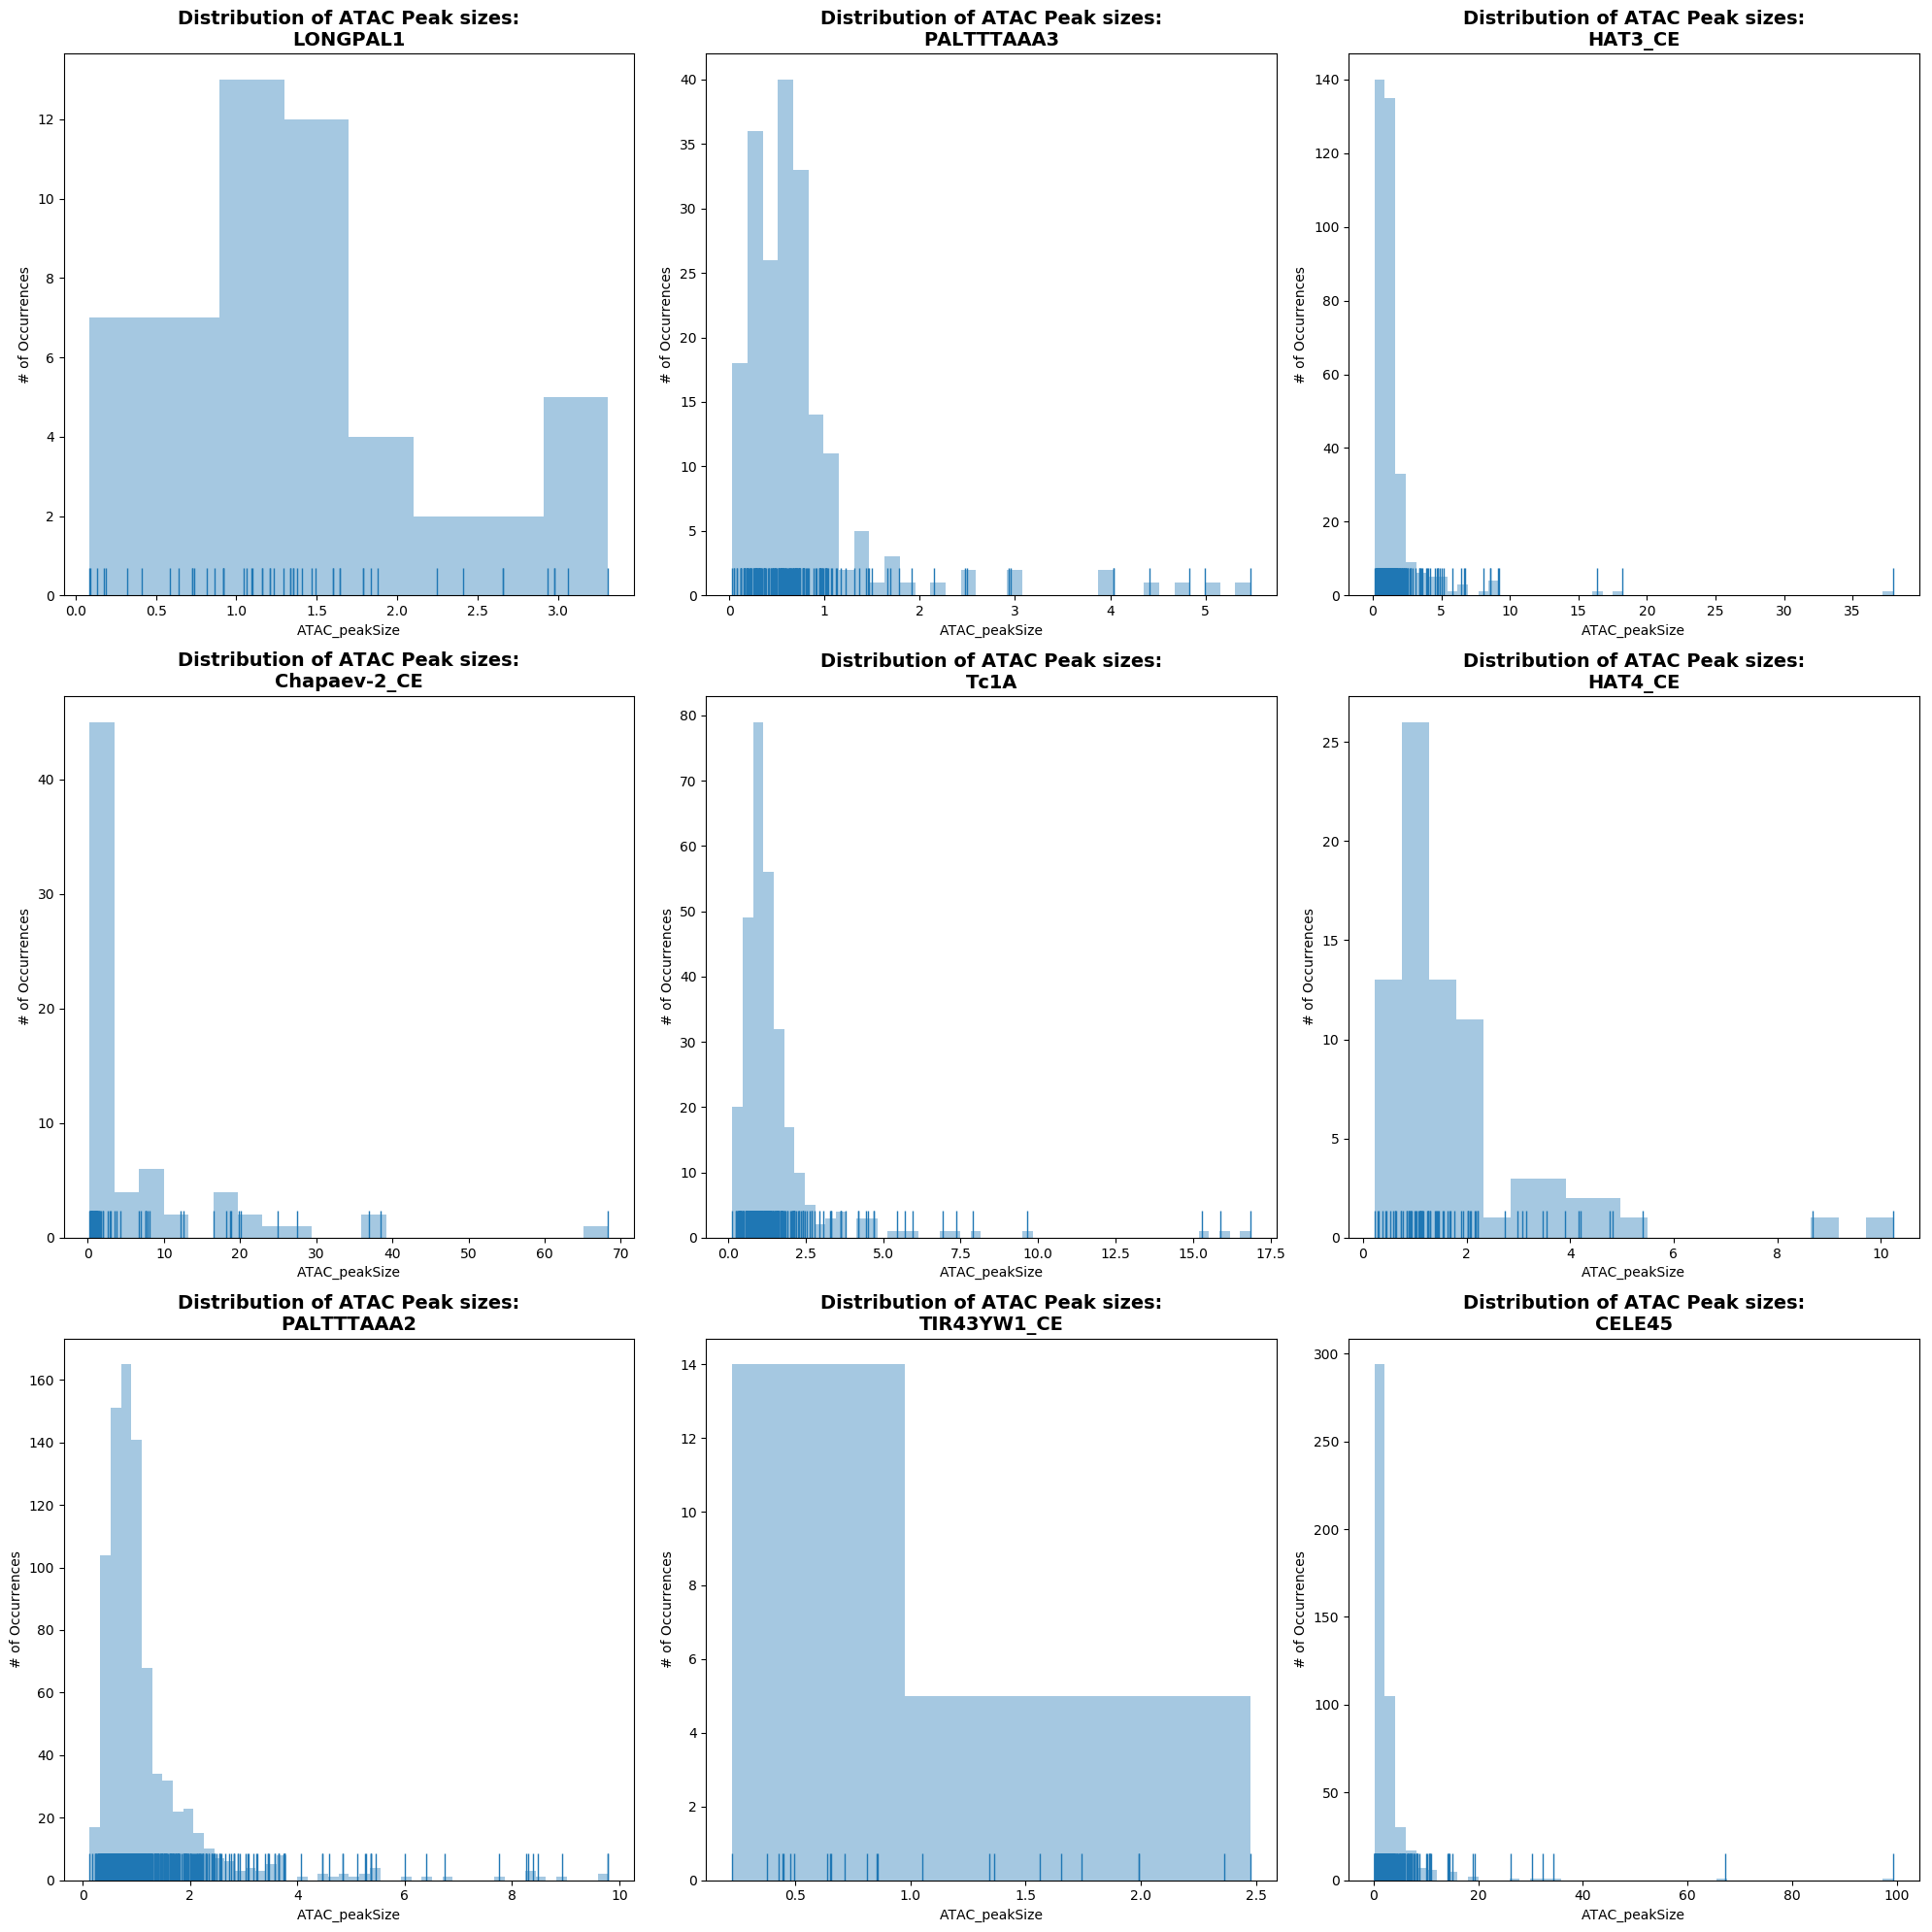

In [16]:
#setup plot
sns_plot7 = plt.figure(figsize=[20,20], dpi=100)

#loopit
for rep,num in zip(re_list1, range(1,10)):
    x = df_cluster[df_cluster["RE_repeat"]== rep]
    plt.subplot(3,3,num)
    sns.distplot(x['ATAC_peakSize'],kde=False, rug=True)
    plt.ylabel("# of Occurrences")
    plt.title("Distribution of ATAC Peak sizes:\n" + rep, fontweight="bold", fontsize=14)
    plt.tight_layout()
plt.show()

#sns_plot7.savefig("/Users/patrickgonzales/Desktop/TomRepeats_ATACpeakSizeDistributionoverRE_list1.png")

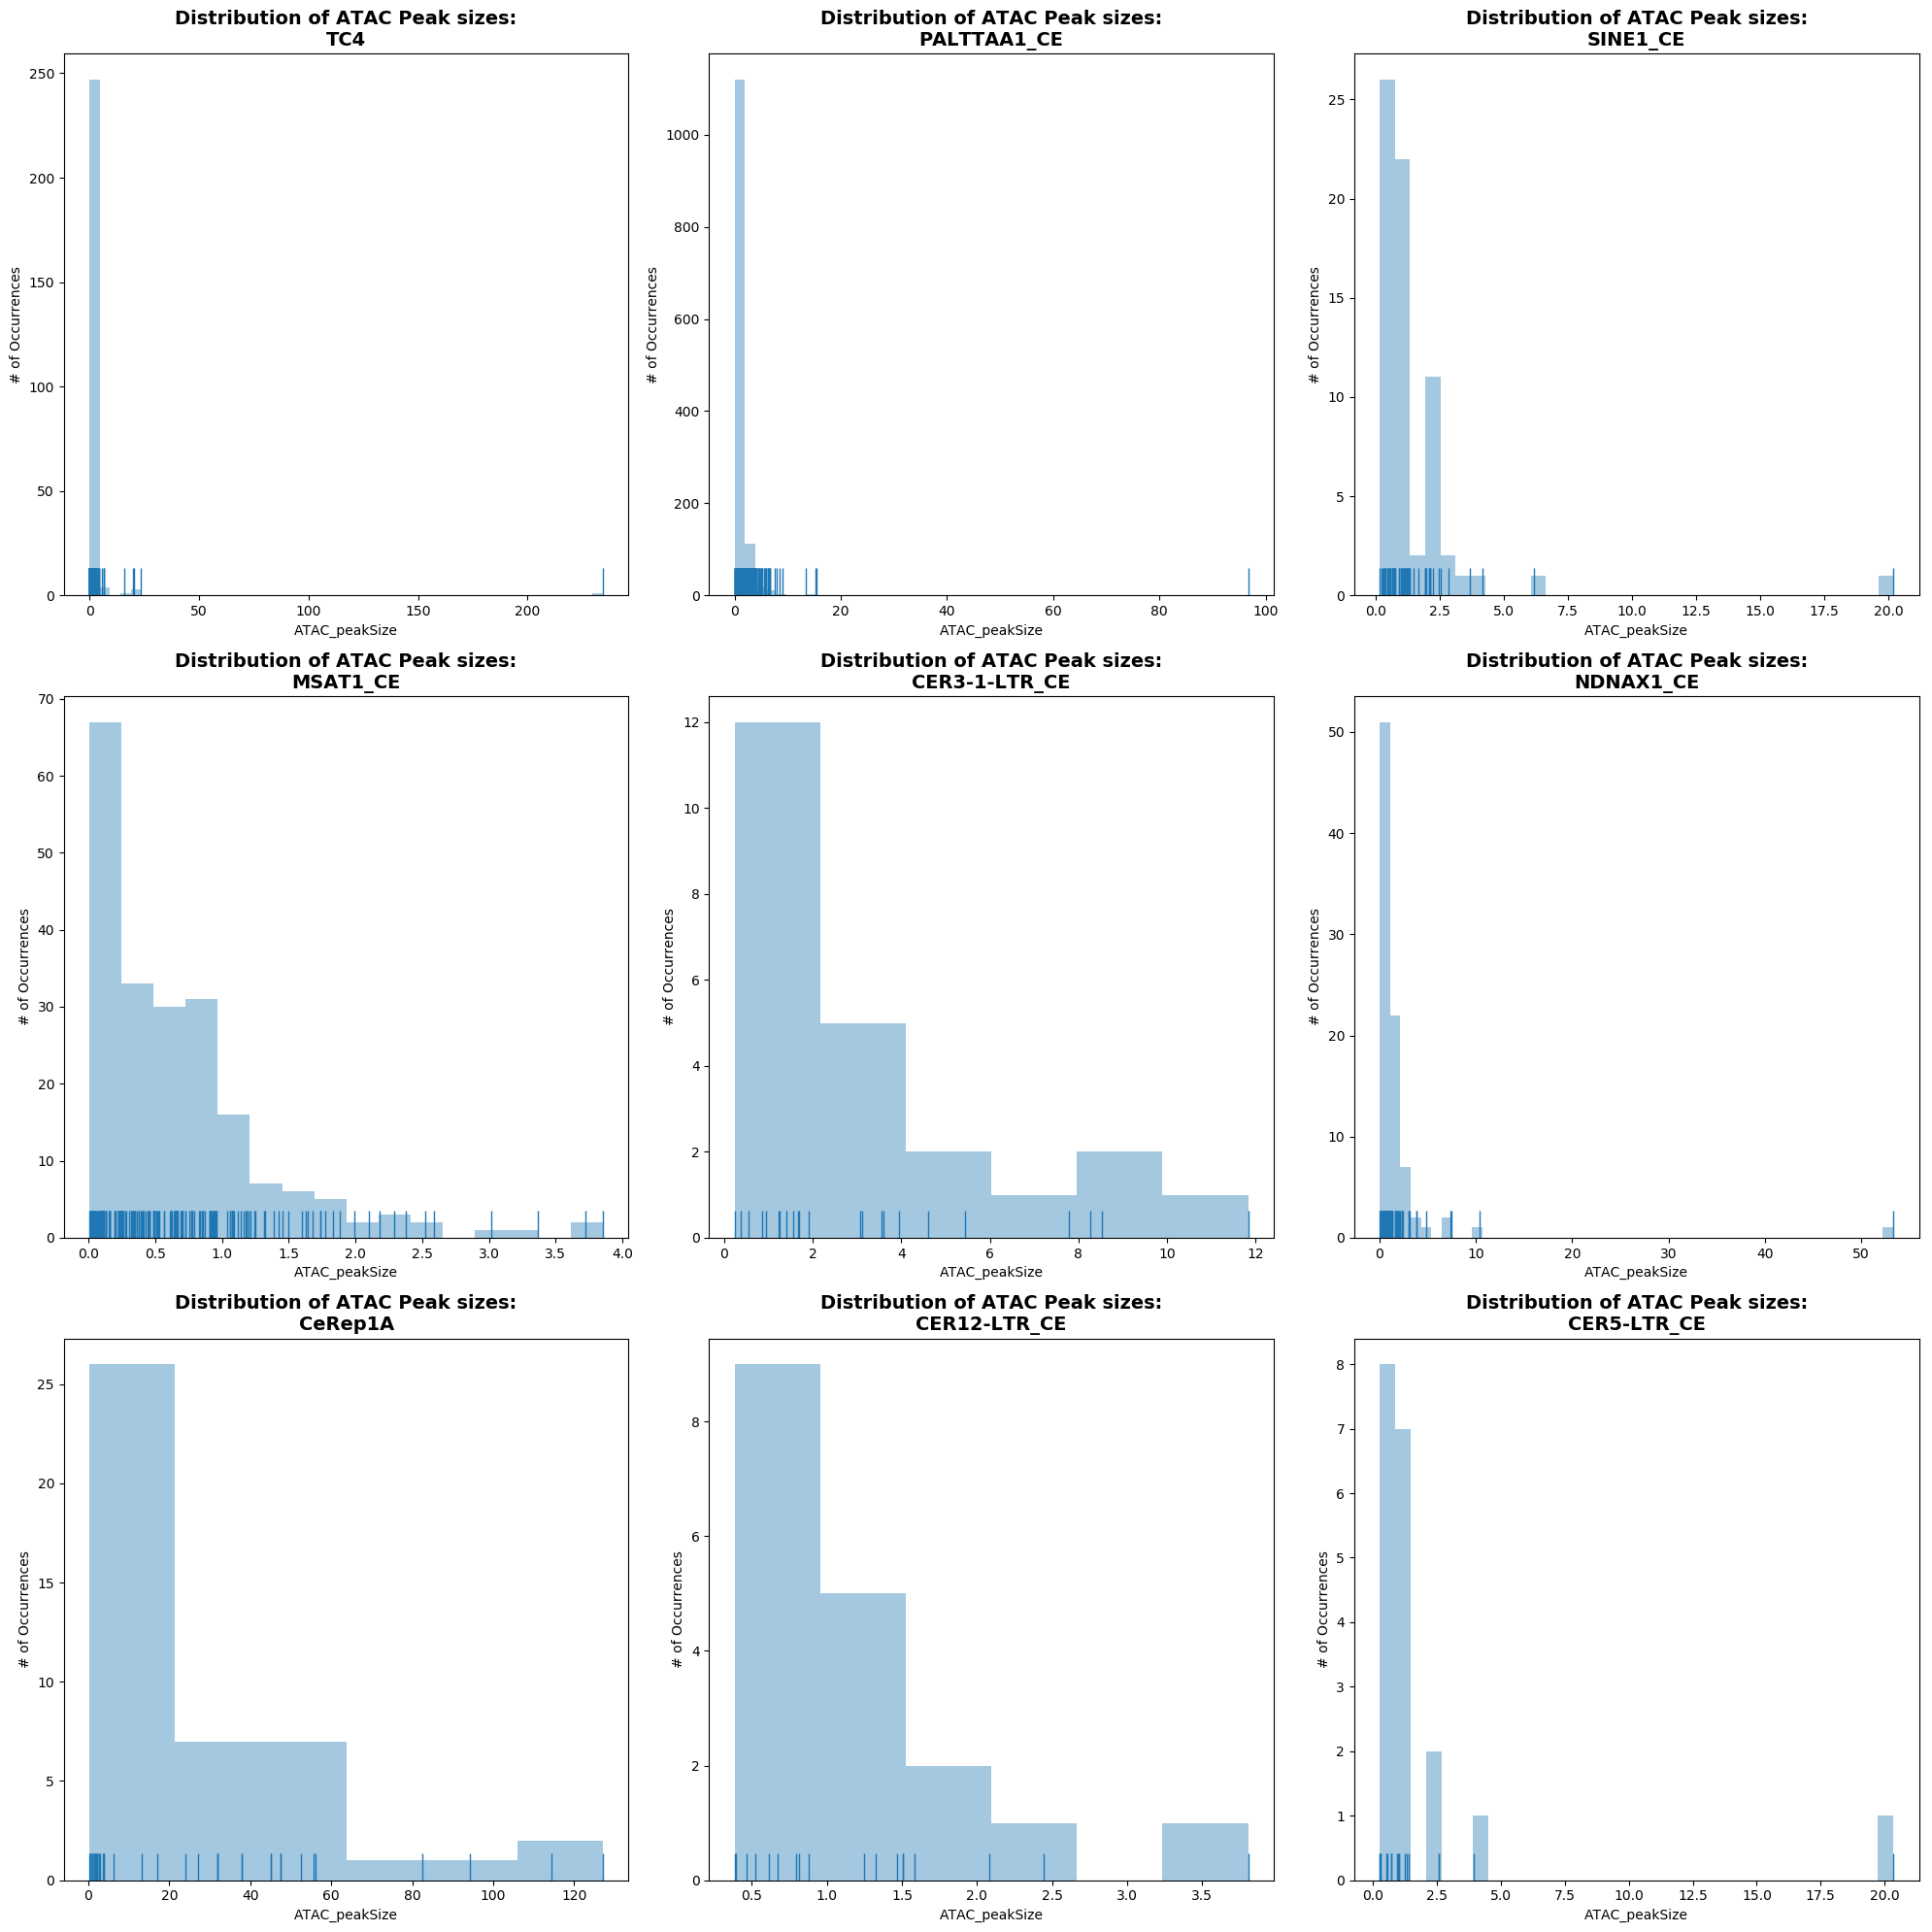

In [17]:
#setup plot
sns_plot8 = plt.figure(figsize=[20,20], dpi=100)

#loopit
for rep,num in zip(re_list2, range(1,10)):
    x = df_cluster[df_cluster["RE_repeat"]== rep]
    plt.subplot(3,3,num)
    sns.distplot(x['ATAC_peakSize'],kde=False, rug=True)
    plt.ylabel("# of Occurrences")
    plt.title("Distribution of ATAC Peak sizes:\n" + rep, fontweight="bold", fontsize=14)
    plt.tight_layout()
plt.show()

#sns_plot8.savefig("/Users/patrickgonzales/Desktop/TomRepeats_ATACpeakSizeDistributionoverRE_list2.png")

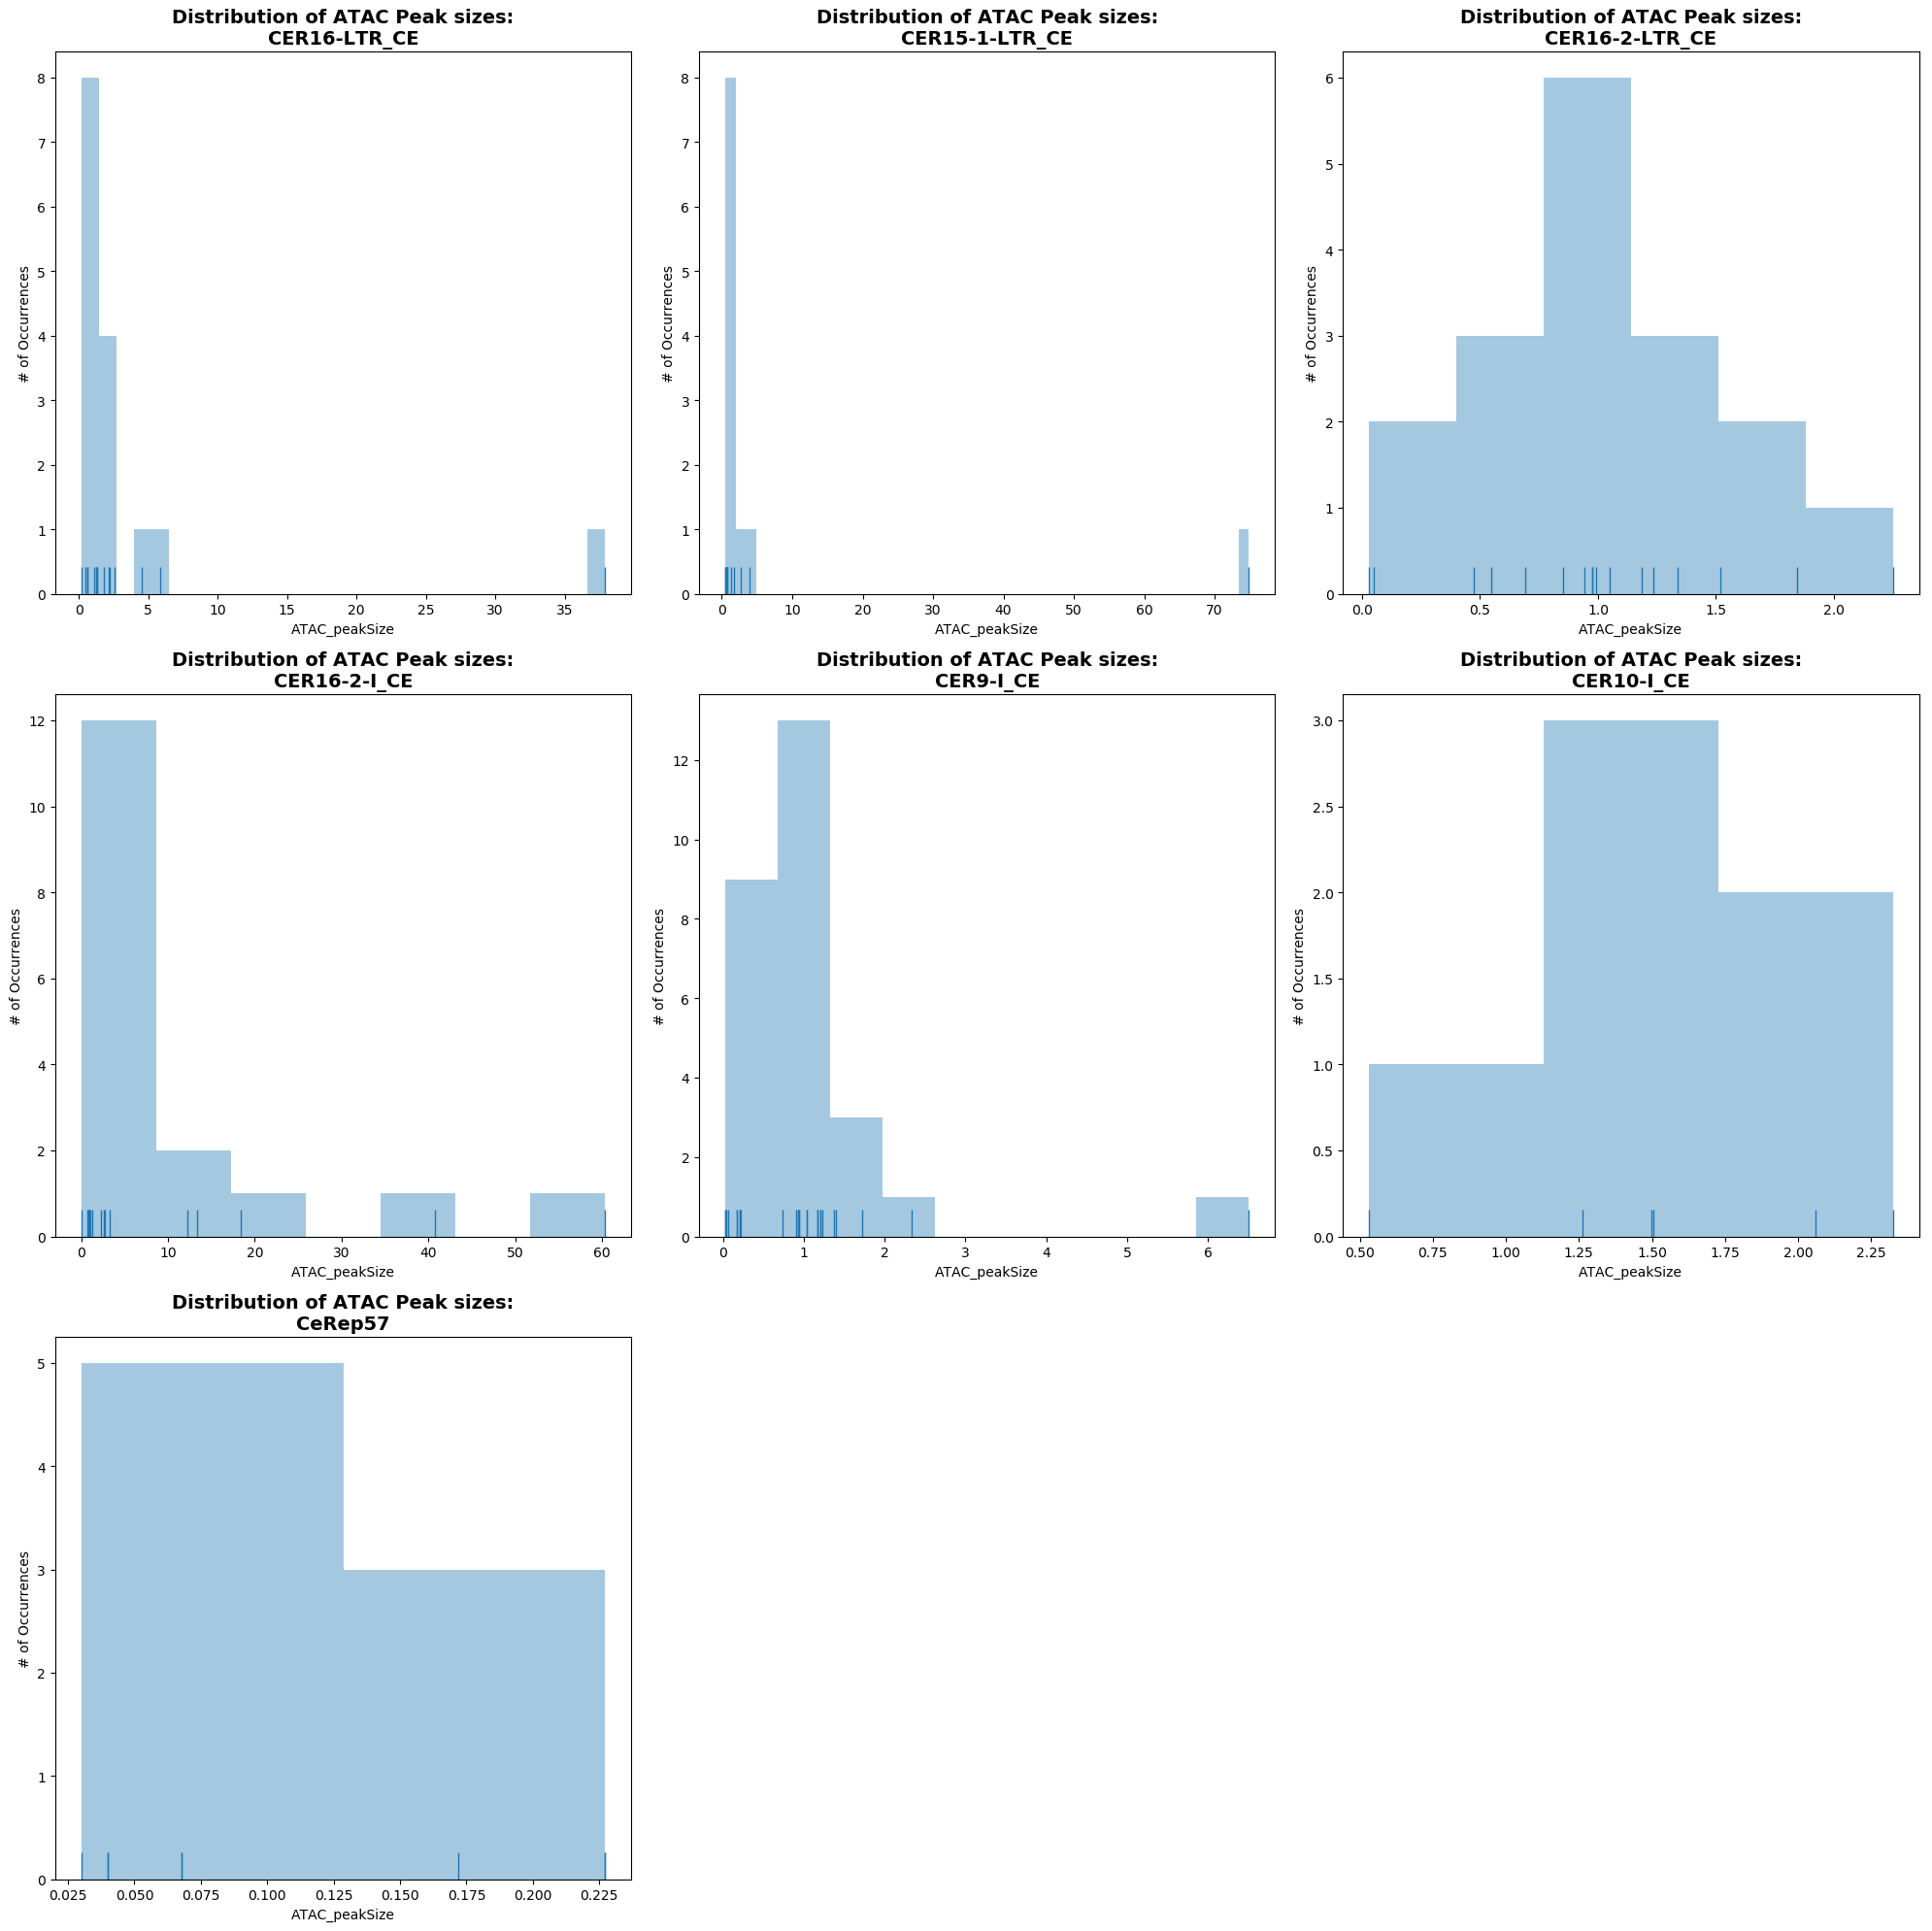

In [18]:
#setup plot
sns_plot9 = plt.figure(figsize=[20,20], dpi=100)

#loopit
for rep,num in zip(re_list3, range(1,10)):
    x = df_cluster[df_cluster["RE_repeat"]== rep]
    plt.subplot(3,3,num)
    sns.distplot(x['ATAC_peakSize'],kde=False, rug=True)
    plt.ylabel("# of Occurrences")
    plt.title("Distribution of ATAC Peak sizes:\n" + rep, fontweight="bold", fontsize=14)
    plt.tight_layout()
plt.show()

#sns_plot9.savefig("/Users/patrickgonzales/Desktop/TomRepeats_ATACpeakSizeDistributionoverRE_list3.png")